In [3]:
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

2024-05-01 22:16:50.872053: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
file_path='/Users/johnson/Documents/Lung_Disease/dataset'

In [4]:
name_class=os.listdir(file_path)
name_class

['COVID19', '.DS_Store', 'CANCER', 'PNEUMONIA', 'NORMAL']

In [6]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [7]:
filepaths

['/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(309).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(470).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(535).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(165).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(92).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(427).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(132).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(562).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(348).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(431).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(84).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(574).jpg',
 '/Users/johnson/Documents/Lung_Disease/dataset/COVID19/COVID19(124).jpg',
 '/Users/johnson/Documents/

In [8]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
labels

['COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'CO

In [9]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(6)

,Filepath,Label
0,/Users/johnson/Documents/Lung_Disease/dataset/...,CANCER
1,/Users/johnson/Documents/Lung_Disease/dataset/...,PNEUMONIA
2,/Users/johnson/Documents/Lung_Disease/dataset/...,PNEUMONIA
3,/Users/johnson/Documents/Lung_Disease/dataset/...,CANCER
4,/Users/johnson/Documents/Lung_Disease/dataset/...,CANCER
5,/Users/johnson/Documents/Lung_Disease/dataset/...,COVID19


([0, 1, 2, 3],
 [Text(0, 0, 'PNEUMONIA'),
  Text(1, 0, 'CANCER'),
  Text(2, 0, 'NORMAL'),
  Text(3, 0, 'COVID19')])

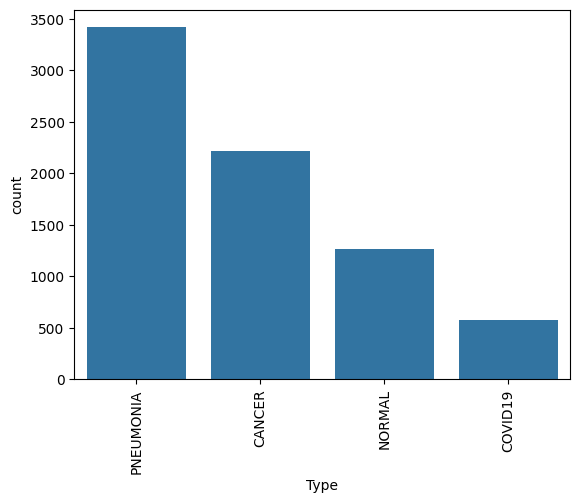

In [10]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

In [11]:
# fig, axes = plt.subplot(5, 3, 1,figsize=(
#     10,8),subplot_kw={'xticks': [], 'yticks': []})
# for i, ax in enumerate(axes.flat):
#     ax.imshow(plt.imread(data.Filepath[i]))
#     ax.set_title(data.Label[i])
# plt.tight_layout()
# plt.show()

In [12]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [13]:
batch_size = 32
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset='validation'
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    seed=42,
)


Found 4488 validated image filenames belonging to 4 classes.
Found 374 validated image filenames belonging to 4 classes.
Found 1870 validated image filenames belonging to 4 classes.


In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

pretrained_model = ResNet50(
    input_shape=(100, 100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [15]:
inputs = pretrained_model.input
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(len(train_gen.class_indices),activation='softmax')(
    x)  #Dynamic number of output units

model = Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
# my_callbacks = [EarlyStopping(
#    monitor='val_accuracy',
#    min_delta=0,
#    patience=2,
#    mode='auto'
#)]

In [17]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=20,
    # callbacks=my_callbacks
)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.8473 - loss: 0.4028 - val_accuracy: 0.9144 - val_loss: 0.2372
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9524 - loss: 0.1392 - val_accuracy: 0.9332 - val_loss: 0.1780
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.9575 - loss: 0.1177 - val_accuracy: 0.9412 - val_loss: 0.1786
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9749 - loss: 0.0760 - val_accuracy: 0.9385 - val_loss: 0.1529
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9734 - loss: 0.0722 - val_accuracy: 0.9385 - val_loss: 0.1755
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9847 - loss: 0.0450 - val_accuracy: 0.9519 - val_loss: 0.1544
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9385 - val_loss: 0.1552
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9868 - loss: 0.0367 - val_accuracy: 0.951

In [18]:
model.save("4_model_resnet50.h5")

In [21]:
#pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
#plt.title("Accuracy")
#plt.show()

#pd.Dataframe(history.history)[['loss', 'val_loss']].plot()
#plt.title("Loss")
#plt.show()

In [19]:
#Evaluate the model on the test set
test_results = model.evaluate(test_gen, verbose=0)
print(" Test Loss: {:.5f}".format(test_results[0]))
print("Test Accuracy: {:.2f}%".format(test_results[1] * 100))

 Test Loss: 0.23860
Test Accuracy: 95.35%


In [20]:
#Predict the Label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)

#map the label
labels = (train_gen.class_indices)
labels = dict((v, k) for k,v in labels.items())
pred = [ labels[k] for k in pred]

print(pred)

59/59 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step
['NORMAL', 'CANCER', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'CANCER', 'PNEUMONIA', 'PNEUMONIA', 'CANCER', 'PNEUMONIA', 'COVID19', 'CANCER', 'CANCER', 'NORMAL', 'NORMAL', 'CANCER', 'CANCER', 'PNEUMONIA', 'PNEUMONIA', 'CANCER', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'CANCER', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'CANCER', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'CANCER', 'PNEUMONIA', 'NORMAL', 'CANCER', 'NORMAL', 'PNEUMONIA', 'CANCER', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'NORMAL', 'CANCER', 'NORMAL', 'CANCER', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'CANCER', 'NORMAL', 'PNEUMONIA', 'CANCER', 'PNEUMONIA', 'NORMAL', 'CANCER', 'PNEUMONIA', 'PNE

In [21]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      CANCER       0.29      0.29      0.29       561
     COVID19       0.08      0.07      0.07       156
      NORMAL       0.22      0.21      0.21       328
   PNEUMONIA       0.45      0.46      0.45       825

    accuracy                           0.33      1870
   macro avg       0.26      0.26      0.26      1870
weighted avg       0.33      0.33      0.33      1870



In [ ]:
#fig, axes = plt.subplots(nrows=5, cols=2, figsize=(12,8),
#subplot_kw={'xticks': [], 'yticks': []})
#for i, ax in enumerate(axes.flat):
#    ax.imshow(plt.imread(test.Filepath.iloc[i]))
#    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
#plt.tight_layout()
#plt.show()

In [22]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = "3.png"

img = cv2.imread(img_path)
img = cv2.resize(img, (100, 100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result * 100).astype('int'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[100   0   0   0]]
